<a href="https://colab.research.google.com/github/ZakariaElKazdam/EDA/blob/main/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving heart_disease_dataset.csv to heart_disease_dataset (1).csv


**This is a file where i am going to try and master exploratory data analysis
Now for achieving such mession , there is no general formula and something that works for everything , everything depends on the type of data we're handling and the task we're using this data for. However, there is 11 steps that seems to be necessary for all types of data , for EDA  in general**

1. Data Collection

The first step is to collect all relevant raw data for the project from various appropriate sources like databases, CSV files, APIs, web scraping etc. It is important to clearly understand the context and domain of the problem being addressed, the features available in the dataset, their expected formats and any other metadata provided to select only the necessary data.

In [ ]:
import pandas as pd
df = pd.read_csv('heart_disease_dataset.csv')
df.head(5)

,Age,Gender,Cholesterol,Blood Pressure,Heart Rate,Smoking,Alcohol Intake,Exercise Hours,Family History,Diabetes,Obesity,Stress Level,Blood Sugar,Exercise Induced Angina,Chest Pain Type,Heart Disease
0,75,Female,228,119,66,Current,Heavy,1,No,No,Yes,8,119,Yes,Atypical Angina,1
1,48,Male,204,165,62,Current,NaN,5,No,No,No,9,70,Yes,Typical Angina,0
2,53,Male,234,91,67,Never,Heavy,3,Yes,No,Yes,5,196,Yes,Atypical Angina,1
3,69,Female,192,90,72,Current,NaN,4,No,Yes,No,7,107,Yes,Non-anginal Pain,0
4,62,Female,172,163,93,Never,NaN,6,No,Yes,No,2,183,Yes,Asymptomatic,0


now let's get an idea about the columns and data in general

In [ ]:
df.info()
#verbose = False to not print the full summary , default is True

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1000 non-null   int64 
 1   Gender                   1000 non-null   object
 2   Cholesterol              1000 non-null   int64 
 3   Blood Pressure           1000 non-null   int64 
 4   Heart Rate               1000 non-null   int64 
 5   Smoking                  1000 non-null   object
 6   Alcohol Intake           660 non-null    object
 7   Exercise Hours           1000 non-null   int64 
 8   Family History           1000 non-null   object
 9   Diabetes                 1000 non-null   object
 10  Obesity                  1000 non-null   object
 11  Stress Level             1000 non-null   int64 
 12  Blood Sugar              1000 non-null   int64 
 13  Exercise Induced Angina  1000 non-null   object
 14  Chest Pain Type          1000 non-null   

we can see from the cell up that there a 1000 ligns in the data , all the colomuns have no null value except 'Alcohol Intake ' that has 340 null values.
also we have two types of columns only : object wich refers to strings or mixed types and int64 which refers to ints (64 bits)

In [ ]:
df.describe(include='all')

# we can include or exclude whatever type of data we want  , 'all' for all colums (all types)

,Age,Gender,Cholesterol,Blood Pressure,Heart Rate,Smoking,Alcohol Intake,Exercise Hours,Family History,Diabetes,Obesity,Stress Level,Blood Sugar,Exercise Induced Angina,Chest Pain Type,Heart Disease
count,1000.000000,1000,1000.000000,1000.0000,1000.000000,1000,660,1000.000000,1000,1000,1000,1000.000000,1000.000000,1000,1000,1000.000000
unique,NaN,2,NaN,NaN,NaN,3,2,NaN,2,2,2,NaN,NaN,2,4,NaN
top,NaN,Female,NaN,NaN,NaN,Never,Heavy,NaN,No,Yes,No,NaN,NaN,No,Non-anginal Pain,NaN
freq,NaN,503,NaN,NaN,NaN,338,346,NaN,501,505,501,NaN,NaN,528,256,NaN
mean,52.293000,NaN,249.939000,135.2810,79.204000,NaN,NaN,4.529000,NaN,NaN,NaN,5.646000,134.941000,NaN,NaN,0.392000
std,15.727126,NaN,57.914673,26.3883,11.486092,NaN,NaN,2.934241,NaN,NaN,NaN,2.831024,36.699624,NaN,NaN,0.488441
min,25.000000,NaN,150.000000,90.0000,60.000000,NaN,NaN,0.000000,NaN,NaN,NaN,1.000000,70.000000,NaN,NaN,0.000000
25%,39.000000,NaN,200.000000,112.7500,70.000000,NaN,NaN,2.000000,NaN,NaN,NaN,3.000000,104.000000,NaN,NaN,0.000000
50%,52.000000,NaN,248.000000,136.0000,79.000000,NaN,NaN,4.500000,NaN,NaN,NaN,6.000000,135.000000,NaN,NaN,0.000000
75%,66.000000,NaN,299.000000,159.0000,89.000000,NaN,NaN,7.000000,NaN,NaN,NaN,8.000000,167.000000,NaN,NaN,1.000000


In [ ]:
df.duplicated(subset=['Age', 'Heart Rate'])

#duplicated return a boolean serie , parameters : subset : list of columns we're interested in
# keep : default is 'first'.
#'first' means set the first occurrence to False, the rest to True. 'last' same thing but for last occurence
# False means set all occurrences to True.

,0
0,False
1,False
2,False
3,False
4,False
...,...
995,True
996,False
997,False
998,False


In [ ]:
print("the number of duplicated lines is " , df.duplicated().sum())
#if some duplicated values were noticed , we would delete  while keeping the first occurence or last
#cz they would mess with the distributions

the number of duplicated lines is  0


Now the next step is **data wrangling**

Once the raw data is collected, it needs to be cleaned, organized and transformed into a format suitable for analysis. This involves tasks like removing duplicate records where the same data point is listed twice or more to avoid skewing results. Missing values are ubiquitous in real-world datasets and need handling either by removing cases with missing data or imputing substitute values.


Now , from what we've seen **there are no duplicates**
but the column **Alcohol Intake** has more than 330 missing values , now we can't just remove them because we'll be sacrificing almost 33% of the data

What we'll do is first find a way to complete this missing values and then question why is this much of data missing and is there any pattern behind it so we can fix the problem and not face it in the future and also get how to complete them

Matter of fact , there are three types of missing values and each one is treated differently **(MCAR/ MAR/ MNAR)**

Consider a variable X for which some data is missing. Here is the definition of three processes for generating missing data.

The missing data of X are said to be missing completely at random **(MCAR)** if the probability that the value of X is missing depends neither on the value of X (which is not observed) nor on the values of other variables.
The assumption that the missing data are completely random is generally considered too restrictive

The missing data of X are said to be missing at random **(MAR)** if the probability that the value of X is missing does not depend on the value of X (which is not observed) once we have controlled for the other variables.

The missing data of X are said to be missing not at random **(MNAR)** if the probability that the value of X is missing depends on the value of X itself. For example, people with high incomes might be more reluctant to answer a question about their income.

**Little's MCAR test** can help us determine if the missing data in your dataset is completely random. If the test suggests that the data is not MCAR, then we must decide between MAR and MNAR, but distinguishing between these two directly using a statistical test is more challenging.
There are also different statistical methodes to fill (in case we didn,'t decide to remove) the missing values depending on the type of missing values (numerical , categorical ... ) and which case we're dealing with mcar, mar , mnar ... ( but I won't dive into them)
since R test are not predefined here in python

In [ ]:
df['Alcohol Intake'].unique()

array(['Heavy', nan, 'Moderate'], dtype=object)



As we can see the values that 'Alcohol intake' are Heavy and Moderate only , so i'm making the hypothesis that this is a MNAR case where the person charged of filling the formular has only the two options ,  As a result the prople that doesn't drink or take alcohol less than one drink (for women) or two (for men ) per day can't choose neither options and thus the Nan presence
We'll replace nan by 'Low or never ' ( this was also inspired by the categories of the smoking levels :) )

In [ ]:
df['Alcohol Intake']= df['Alcohol Intake'].fillna('Rare or never')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1000 non-null   int64 
 1   Gender                   1000 non-null   object
 2   Cholesterol              1000 non-null   int64 
 3   Blood Pressure           1000 non-null   int64 
 4   Heart Rate               1000 non-null   int64 
 5   Smoking                  1000 non-null   object
 6   Alcohol Intake           1000 non-null   object
 7   Exercise Hours           1000 non-null   int64 
 8   Family History           1000 non-null   object
 9   Diabetes                 1000 non-null   object
 10  Obesity                  1000 non-null   object
 11  Stress Level             1000 non-null   int64 
 12  Blood Sugar              1000 non-null   int64 
 13  Exercise Induced Angina  1000 non-null   object
 14  Chest Pain Type          1000 non-null   

Now that we dealed with the missing values ,  it's crucial to understand the distributions and characteristics of each variable: **Univariate Analysis**

In [ ]:
import matplotlib .pyplot as plt
def draw_hist ( colonne , figsize =(12,6) ,  color='red' , bins =10 , edge_color='black' , xlabel= None , ylabel = "Frequency"  , title = None) :
  plt.figure(figsize=figsize)
  plt.hist(df[colonne] , bins = bins , color = color , edgecolor= edge_color)
  if xlabel:
    plt.xlabel(xlabel)
  if title :
    plt.title(title)
  plt.ylabel(ylabel)
  plt.show()


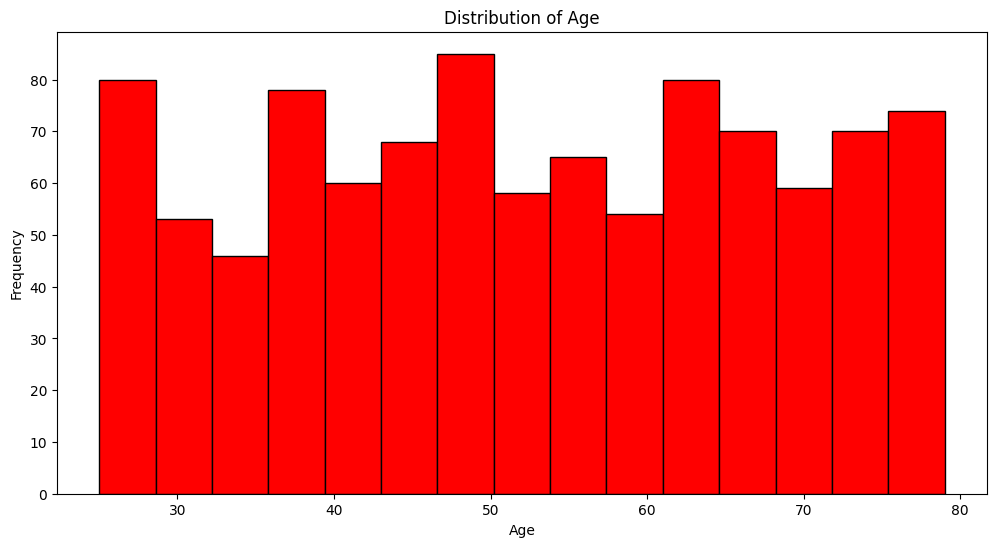

In [ ]:
draw_hist('Age', bins=15, xlabel='Age', title='Distribution of Age')


we can see from the distribution of age that it variates from 22 until 78 approximatly, however there is no dominant interval of age in comparaison with the others and strong presence of the tranche of age 45-50 ( over 80 patients )

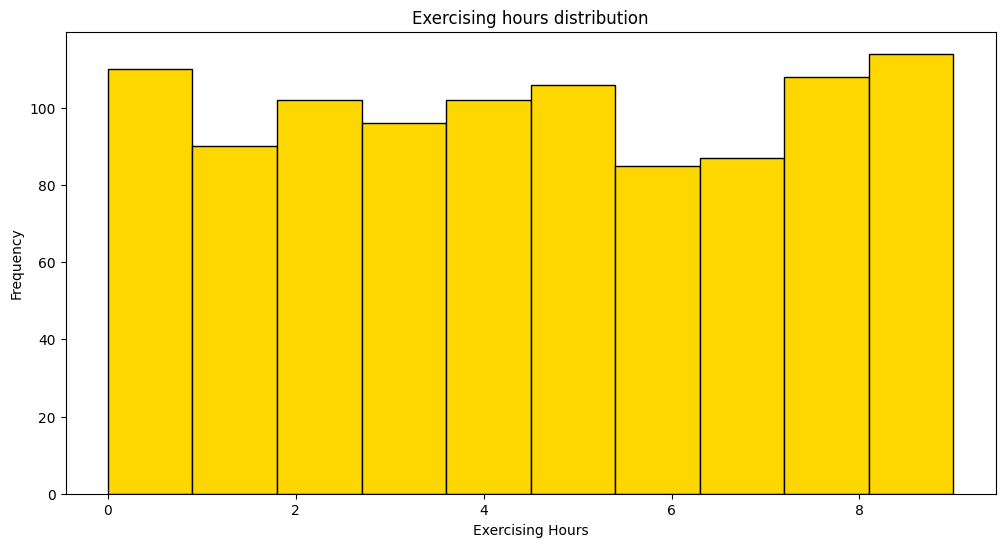

In [ ]:
draw_hist('Exercise Hours', color= 'gold' , bins= 10 , xlabel= 'Exercising Hours' , title = 'Exercising hours distribution')

In [ ]:
df['Exercise Hours'].unique()

array([1, 5, 3, 4, 6, 0, 8, 9, 7, 2])

the exercices hours is a discret variables ranging from 0 to 9 , from the shape of the histograme i can't really deduct a distribution law of the values , however the patients shooses seems to fulfill each categorie of exercise equally

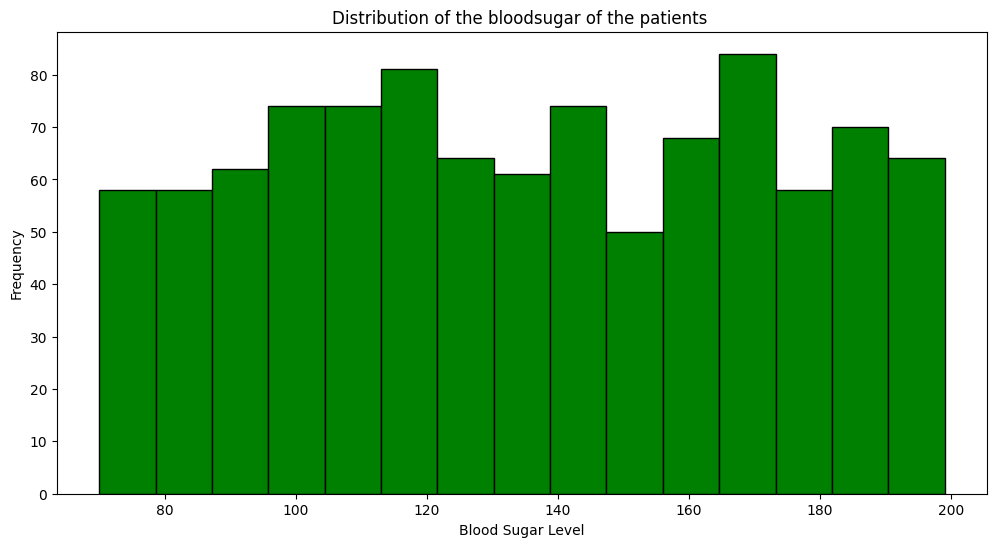

In [ ]:
draw_hist(colonne='Blood Sugar' ,color='green', bins = 15 , figsize=(12,6) , xlabel='Blood Sugar Level'  , title = 'Distribution of the bloodsugar of the patients ')

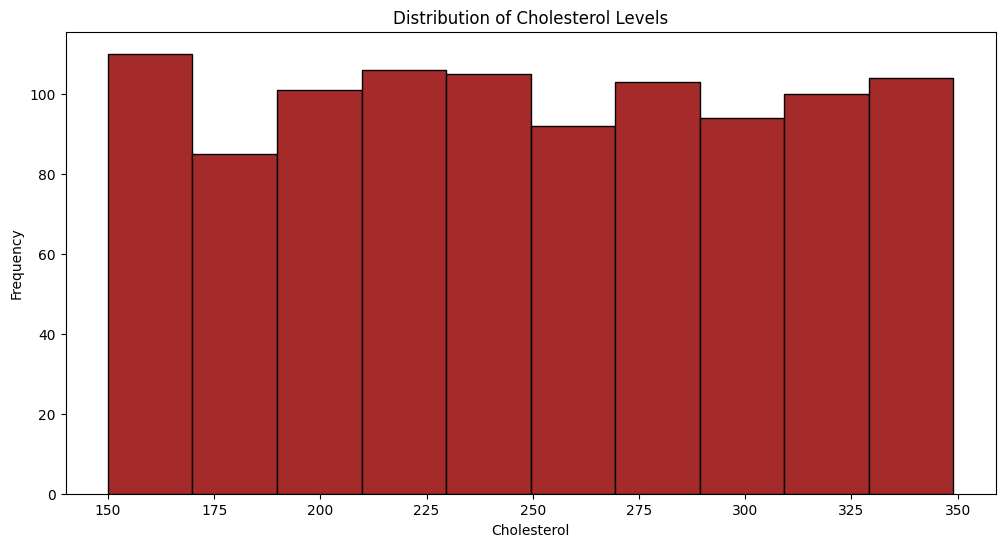

In [ ]:
draw_hist('Cholesterol',color='brown', bins=10, figsize=(12,6), xlabel='Cholesterol', title='Distribution of Cholesterol Levels')


Same for the blood sugar and cholesterol levels, almost equally distributed values of variables over the categories

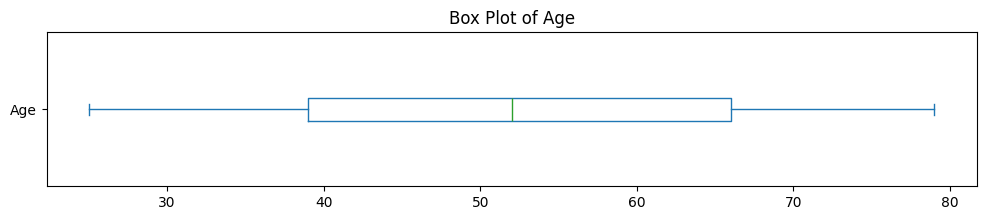

In [ ]:
df['Age'].plot(kind='box', vert= False, figsize=(12, 2))
plt.title('Box Plot of Age')
plt.show()
#boxplot are a cool way to easily detect outliers

Box:

    The central box of the box plot represents the interquartile range (IQR), which is the middle 50% of the data. It extends from the 25th percentile (Q1, first quartile) to the 75th percentile (Q3, third quartile) of the dataset.

Whiskers:

    The lines (or "whiskers") that extend from the top and bottom of the box indicate the extent of the rest of the data, excluding outliers.
    Typically, the whiskers extend to the smallest and largest values within 1.5 times the IQR from the first and third quartiles, respectively. This distance is often calculated as:
        Lower whisker: Q1 - 1.5 * IQR
        Upper whisker: Q3 + 1.5 * IQR
    Data points beyond the end of the whiskers are often considered outliers and can be plotted as individual points.

Median Line:

    Inside the box, there is usually a line that indicates the median (50th percentile) of the data. This line gives a sense of where the middle of the data distribution lies.

Outliers:

    Points that fall outside the whiskers are typically considered outliers and are often represented with dots, small circles, or other markers.

notch:

    Whether to draw a notched boxplot (True), or a rectangular boxplot (False). The notches represent the confidence interval (CI) around the median.

When a data distribution is symmetric, you can expect the median to be in the exact center of the box: the distance between Q1 and Q2 should be the same as between Q2 and Q3. Outliers should be evenly present on either side of the box.

 If a distribution is skewed, then the median will not be in the middle of the box, and instead off to the side. You may also find an imbalance in the whisker lengths, where one side is short with no outliers, and the other has a long tail with many more outliers.

**Categorical Variables**

For categorical variables like Gender, Smoking bar charts and frequency counts are very informative.

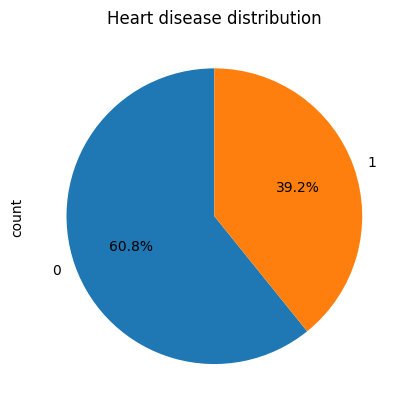

In [ ]:
df['Heart Disease'].value_counts().plot(kind='pie', autopct='%1.1f%%' , startangle = 90)
plt.title('Heart disease distribution')
plt.show()

 Let's break down what '%1.1f%%' means:

 This is the start of the format specifier.

    1.1f:
        1 refers to the minimum number of characters the string should contain; this can be omitted if not necessary.
        .1 specifies the precision of the floating-point number. In this case, it means that one digit will be shown after the decimal point.
        f stands for fixed-point number, which shows the number as a decimal, not exponential.

    %%: The percentage sign is a literal character that appears in format strings. Because % is used as the start of format specifiers, you need to use %% to display a literal % sign.

the data is slighly imbalanced  in term of the heart disease partition of the patients , almost a 10.8% of sain patients

<ipython-input-102-04fb956627a1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Smoking', data=df, palette='Set2')


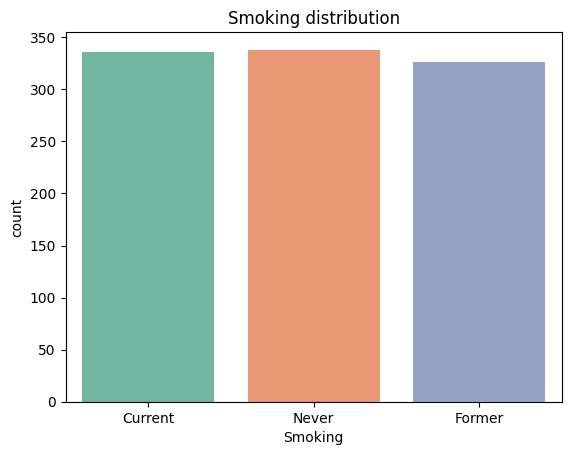

In [ ]:
import seaborn as sns
sns.countplot(x='Smoking', data=df, palette='Set2')
plt.title("Smoking distribution")
plt.show()

Histograms can be easily drawn using seaborn library as well , we can see that the patients chosen are equally distibuted in term of the level of smoking

now let's move to **Bivariate Analysis**

Box plot can be really good in describing how a numerical column is distributed over the groups of a categorical column

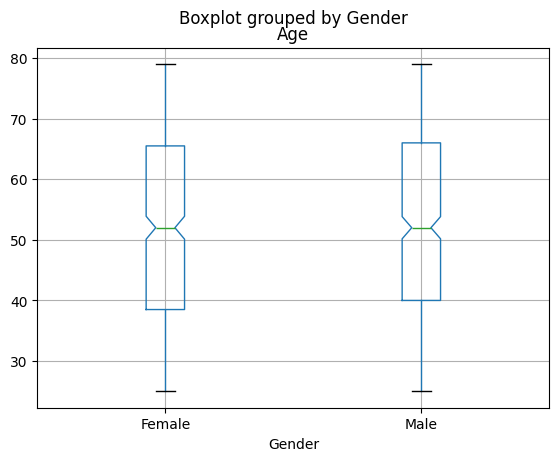

In [ ]:
boxplot = df.boxplot(column=['Age'], by='Gender' , notch = True , whis = 1.5)
#whis for whisker Q3+whis*IQR

We cann see from the two boxplots that the age similarly distributed over the two genders

<Axes: xlabel='Heart Disease', ylabel='Age'>

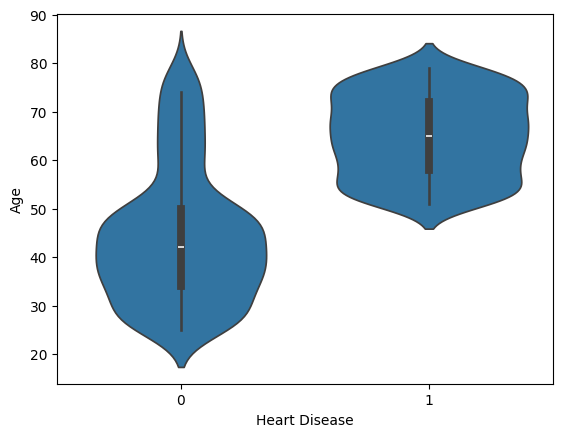

In [ ]:
import seaborn as sns
sns.violinplot(data=df  , x='Heart Disease', y= 'Age')

As we can in the relation between the age and the heart disease , the patients with heart diseases tends more to be over 50 , in the other hand there are patients wiout any diseases of all ages with a strong presence of young people aged 30-40 years old

<Axes: xlabel='Smoking', ylabel='Age'>

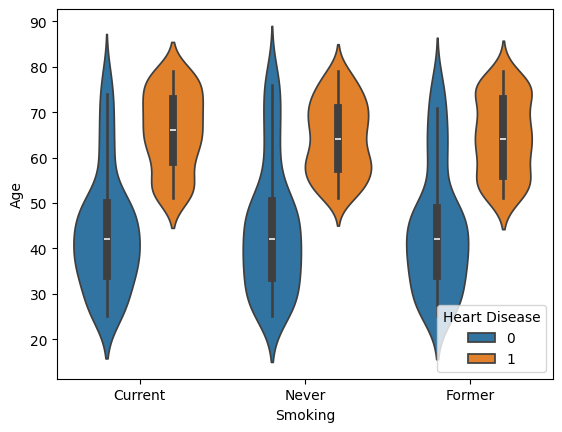

In [ ]:
import seaborn as sns
sns.violinplot(data=df , hue='Heart Disease' , x='Smoking', y= 'Age')

A violin plot depicts distributions of numeric data for one or more groups using density curves. **The width of each curve corresponds with the approximate frequency of data points in each region**.

Violin plots are used when you want to observe the distribution of numeric data, and are especially useful when you want to make a comparison of distributions between multiple groups. ( **hue parameter** )

In a KDE ( kernel density estimation ), each data point contributes a small area around its true value. The shape of this area is called the kernel function. Kernels can take different shapes from smooth bell curves to sharp triangular peaks. In addition, kernels can have different width, or bandwidth, affecting the influence of each individual data point. Bandwidth size is usually determined by using mathematical rules of thumb, but can be tweaked depending on the shape and skew of the data to be plotted.



Now we've seen the distribution of a numerical data over a categorical ( using bow plots or violin plots ) now for a **categorical one over another categorical variable** as well , we can't use the represtations already mentioned, specially when what we're interested in is **counting**

In [ ]:
pd.crosstab( df['Smoking'],df['Heart Disease'], margins = True, margins_name = 'Totals')

Heart Disease,0,1,Totals
Smoking,,,
Current,194,142,336
Former,219,107,326
Never,195,143,338
Totals,608,392,1000


Now what the **crosstab** function does is counting the occurences of the intersections or the possible couples, first param is index and second is columns, the default function is counting frequencies , but we can adjust it to aggregate a speciale function over some other columns for example , we can sum the number of exercising hours for each intersection

In [ ]:
pd.crosstab(df['Smoking'],df['Heart Disease'], values = df['Exercise Hours'], aggfunc=sum)

<ipython-input-107-06b164cbfb3a>:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pd.crosstab(df['Smoking'],df['Heart Disease'], values = df['Exercise Hours'], aggfunc=sum)


Heart Disease,0,1
Smoking,,
Current,917,607
Former,1005,475
Never,852,673


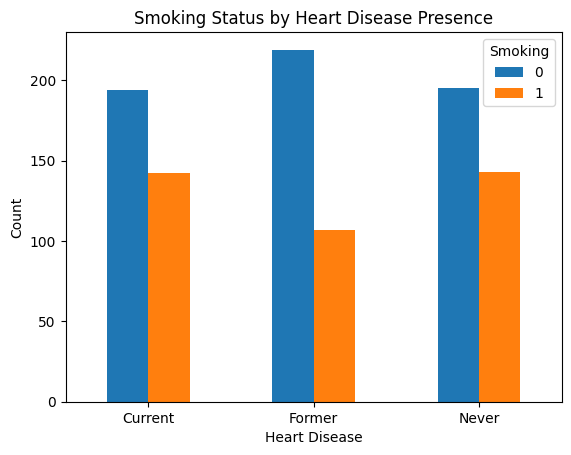

In [ ]:
ct = pd.crosstab( df['Smoking'],df['Heart Disease'])

# Plotting
ct.plot(kind='bar')
plt.title('Smoking Status by Heart Disease Presence')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Keeps the labels horizontal
plt.legend(title='Smoking')
plt.show()

We can't study every single couple of variables and zoom in on their relationships , instead we'll do a **multivariate analysis** and then study the variables that present a high **correlation**
but first let's adjust some columns

In [ ]:
df['Gender']=pd.Categorical(df['Gender']).codes
df['Alcohol Intake']=pd.Categorical(df['Alcohol Intake']).codes
df['Smoking']=pd.Categorical(df['Smoking']).codes
df['Family History']=pd.Categorical(df['Family History']).codes
df['Diabetes']=pd.Categorical(df['Diabetes']).codes
df['Obesity']=pd.Categorical(df['Obesity']).codes
df['Exercise Induced Angina']=pd.Categorical(df['Exercise Induced Angina']).codes
df['Chest Pain Type']=pd.Categorical(df['Chest Pain Type']).codes


In [ ]:
df.head(10)

,Age,Gender,Cholesterol,Blood Pressure,Heart Rate,Smoking,Alcohol Intake,Exercise Hours,Family History,Diabetes,Obesity,Stress Level,Blood Sugar,Exercise Induced Angina,Chest Pain Type,Heart Disease
0,75,0,228,119,66,0,0,1,0,0,1,8,119,1,1,1
1,48,1,204,165,62,0,2,5,0,0,0,9,70,1,3,0
2,53,1,234,91,67,2,0,3,1,0,1,5,196,1,1,1
3,69,0,192,90,72,0,2,4,0,1,0,7,107,1,2,0
4,62,0,172,163,93,2,2,6,0,1,0,2,183,1,0,0
5,77,1,309,110,73,2,2,0,0,1,1,4,122,1,0,1
6,64,0,211,105,86,1,0,8,1,1,1,2,120,0,3,1
7,60,0,208,148,83,2,1,4,0,1,1,2,113,1,0,1
8,37,0,317,137,66,0,0,3,0,1,1,5,114,0,2,0
9,63,1,204,141,68,1,0,8,0,1,0,3,107,0,0,1


<Axes: >

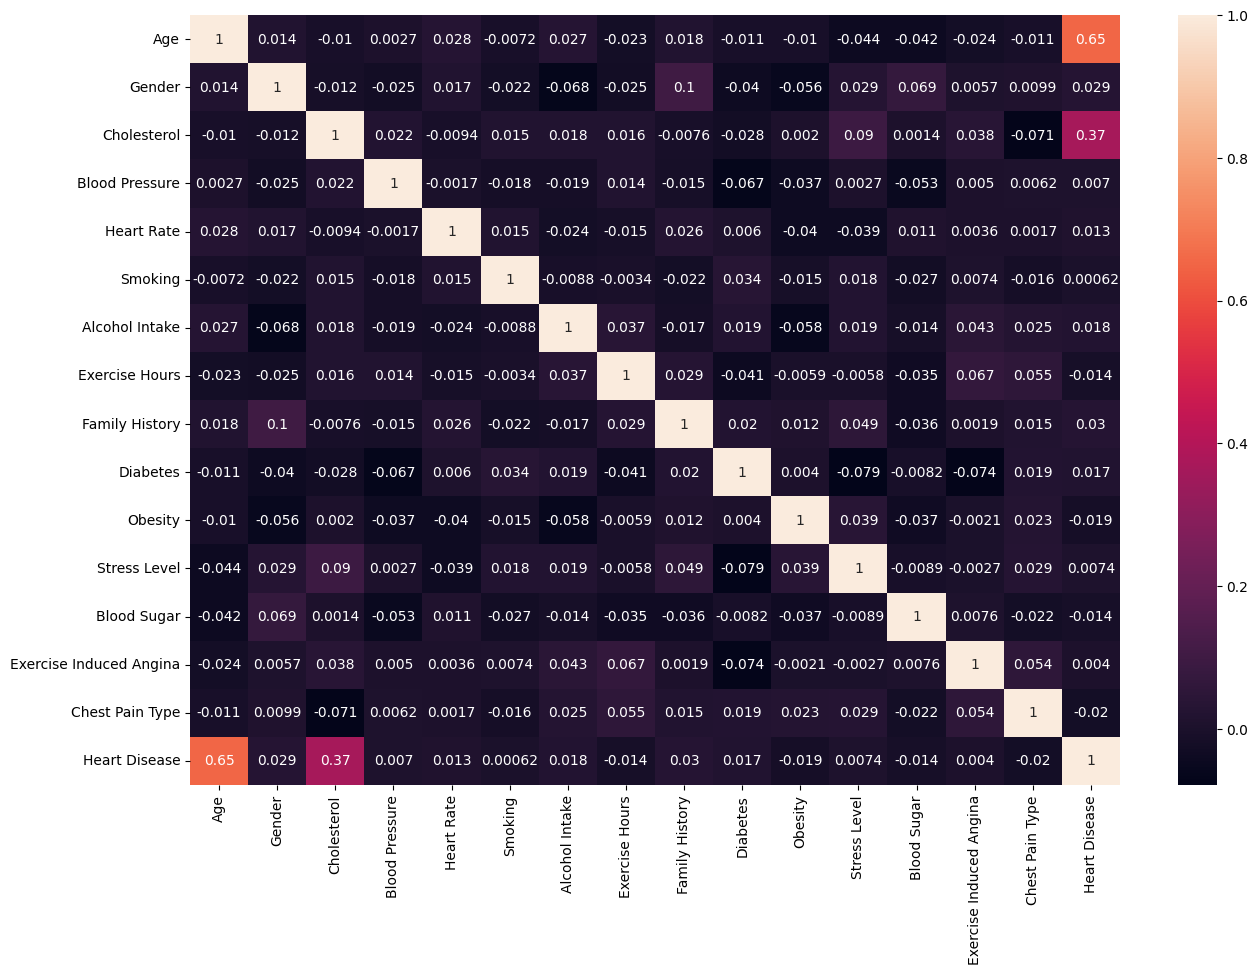

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(method = 'spearman') , annot = True)
#annot=True active l'affichage des annotations (les valeurs numériques) sur la heatmap.
#fmt=".3f" indique que les annotations doivent être formatées comme des nombres flottants avec trois chiffres après la virgule.


Correlation find the exact value of strength in the relationship and the direction as well
Range is from -1 to +1
+ve value suggest they are positively correlated
-ve value suggest they are negatively correlated

Two Methods are use to calculate Correlation Coefficient

  **Pearson** correlation coefficient: Assume data follows Normal Distribution and works well with linear data
  
  **Spearman** correlation coefficient: Don't assume any distribution. Works well with both linear & non-linear

By default while calculating, pearson method is used

We can see from the heat map , that only two variables are correlated enough with the target 'Heart Disease' which are **Age** and **Cholesterol Level**  and both positivly correlated to  the target , however i find it really weird that the **smoking , stress level , or even familiy history** are so little  correlated to Heart Disease
Next we'll do analysis over these variables to see the relationship that links them

**Chi-Square (χ2) Statistic**

A chi-square **test of independence** is a nonparametric hypothesis test.You can use a chi-square test of independence, also known as a chi-square test of association, to determine whether two categorical variables are related.

Like all hypothesis tests, the chi-square test of independence evaluates a null and alternative hypothesis. The hypotheses are two competing answers to the question “Are variable 1 and variable 2 related?”

**Null hypothesis (H0)**: Variable 1 and variable 2 are not related in the population; The proportions of variable 1 are the same for different values of variable 2.

**Alternative hypothesis (H1)**: Variable 1 and  variable 2 are related in the population; The proportions of variable 1 are not the same for different values of  variable 2.

**Expected values**

A chi-square test of independence works by comparing the observed and the expected frequencies. The expected frequencies are such that the proportions of one variable are the same for all values of the other variable.

You can calculate the expected frequencies using the contingency table. The expected frequency for row r and column c is:

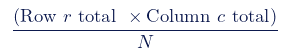

When to use the chi-square test of independence. **The following conditions are necessary** if we want to perform a chi-square goodness of fit test:

Chi-square tests of independence are usually performed on binary or nominal

1.   You want to test a hypothesis about the relationship between two categorical variables (binary, nominal, or ordinal).

    Chi-square tests of independence are usually performed on binary or nominal variables. They are sometimes performed on ordinal variables, although generally only on ordinal variables with fewer than five groups.

2. The sample was randomly selected from the population.
3. There are a minimum of five observations expected in each combined group.
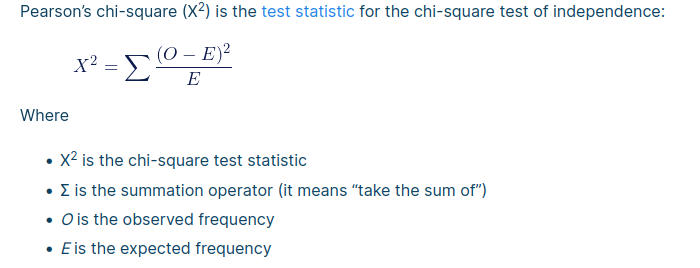


The chi-square test statistic measures how much your observed frequencies differ from the frequencies you would expect if the two variables are unrelated.

If the test statistic is big enough then you should conclude that the observed frequencies are not what you’d expect if the variables are unrelated. **But what counts as big enough?**
We compare the test statistic to a critical value from a chi-square distribution to decide whether it’s big enough to reject the null hypothesis that the two variables are unrelated.